In [ ]:
import numpy as np
from connect_four import Game, GameType

In [1]:
game_init = np.array(
    [
        [2, 2, 2, 1, 0, 1, 0],
        [2, 1, 1, 1, 0, 2, 0],
        [1, 2, 2, 2, 0, 1, 0],
        [2, 1, 1, 1, 0, 2, 0],
        [1, 1, 1, 2, 0, 2, 0],
        [2, 2, 1, 2, 0, 1, 0],
    ]
)

Thinking...


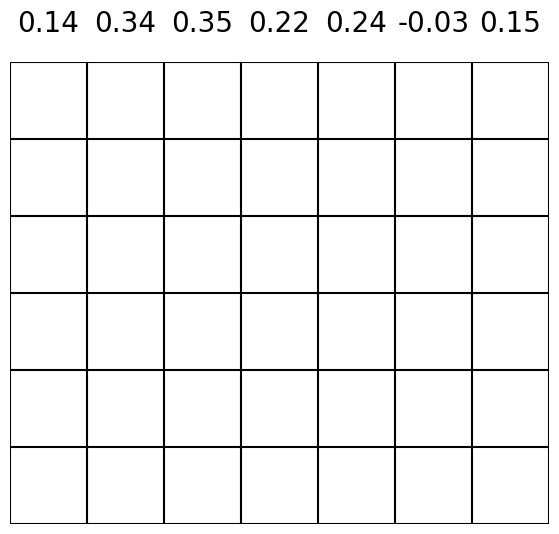

Thinking...


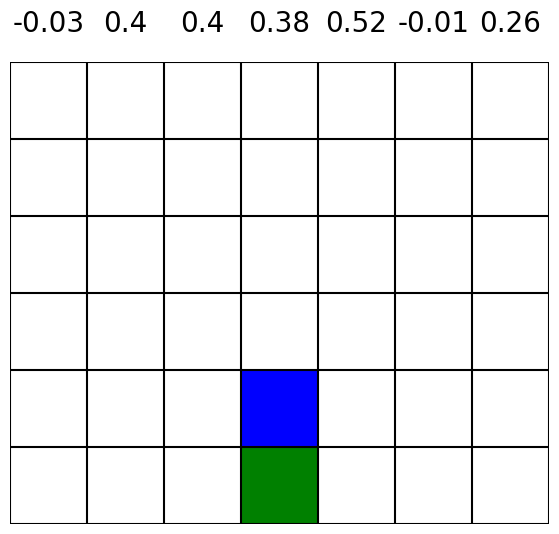

Thinking...


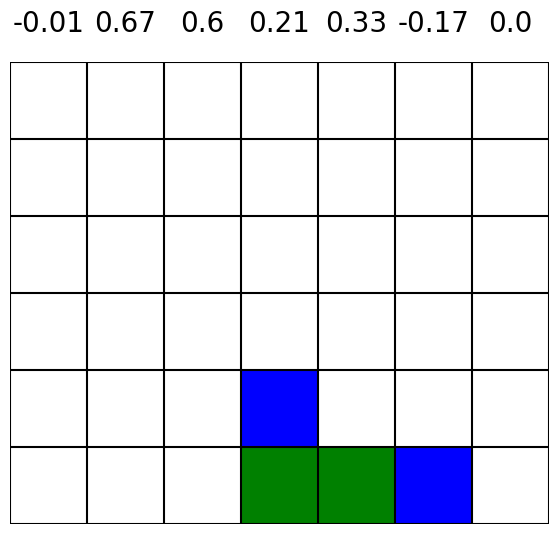

Thinking...


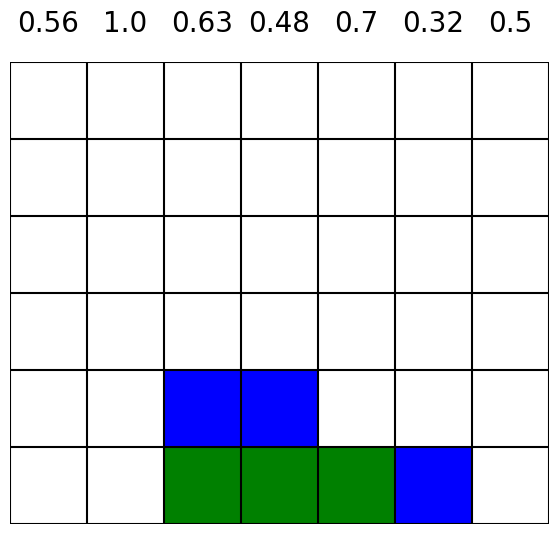

2 is Invalid input. Please enter a number between 0 and 6.
Thinking...


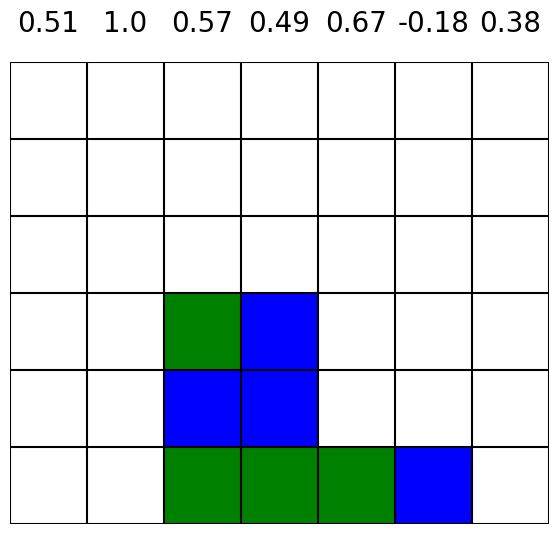

KeyboardInterrupt: Interrupted by user

In [2]:
game.play()